# WordCloud

In [1]:
!pip install konlpy
import re
import konlpy
import pandas as pd

In [2]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기
with open('/content/과제_뉴스 기사.txt', encoding='utf-8') as f:  #본인 디렉토리에 맞게 설정해주세요!
    text = f.readlines()

In [3]:
text

['대출금리도 2.72% 사상최저\n',
 '\n',
 '\n',
 '\n',
 '\t\t\t\t은행 예금에 사상 첫 \'0%대 금리\' 시대가 열렸다. 1억원을 은행에 예금해봤자 연간 100만원 받기도 어렵다는 얘기다. 은행 예·적금이 돈을 불리는 수단이 아닌, 있는 돈을 그저 안전하게 보관하는 \'금고\'에 그치는 시대가 된 셈이다. 이와 더불어 대출 금리는 역대 최저 기록을 갈아치웠다. "이러니 주식·부동산으로 돈이 안 쏠릴 수 없다"는 말이 나온다.\n',
 '\n',
 "한국은행이 31일 발표한 '6월 중 금융기관 가중평균금리'에 따르면, 지난달 은행 예금 금리는 0.88%로 전월 대비 0.19%포인트 내렸다. 역대 처음으로 '1%대' 금리가 깨진 것이다. 은행권의 정기예금 상품 67.1%는 금리 수준이 0%대였다. 코로나 사태 이후 한은이 기준금리를 사상 최저인 0.5%까지 끌어내리면서, 예금 금리 역시 덩달아 내려간 것이다.\n",
 '\n',
 '대출 금리도 일제히 역대 최저 수준으로 떨어졌다. 은행권의 대출 금리는 평균 2.72%로 역대 최저로 집계됐다. 가계 대출 금리는 2.67%였다. 신용대출(3.33→2.93%), 주택담보대출(2.52→2.49%) 모두 내렸다. 특히 신용대출 금리는 전월 대비 0.4%포인트나 떨어졌다. 신용대출 금리가 2%대로 내려온 건 이번이 처음이다.\n',
 '\n',
 '신용대출 금리가 유독 많이 떨어진 것은 정부가 주담대 규제를 강화하자 신용대출을 끌어다 집 사는 사람이 늘었기 때문이다.\n',
 '\n',
 '한은 관계자는 "6·17 부동산 대책을 전후로 주택 매매·전세 거래가 증가했는데, 주택 거래와 관련해 신용 대출을 받는 사람들은 우량 차주 비율이 큰 편"이라며 "신용등급이 높은 우량 차주 비율이 높아지자 전체 신용대출 금리가 떨어지는 현상이 나타났다"고 설명했다.\n',
 '\n',
 "시장금리가 떨어지면서 가계대출은 무서운 속도로 늘고 있다. 한은에 따르면 6월 은행 가계대출은 전월 대비 8조1000억

In [4]:
#빈 줄과 양 끝단의 공백 제거
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)

#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기
p = re.compile(r'\bclass\b')
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)

okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if len(word) == 1:
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

Counter({'6월': 3,
         '가계': 4,
         '가중': 1,
         '강화': 1,
         '거래': 2,
         '경신': 1,
         '관계자': 1,
         '관련': 1,
         '규모': 1,
         '규제': 1,
         '금고': 1,
         '금리': 17,
         '금융': 1,
         '금지': 1,
         '기관': 1,
         '기록': 2,
         '기자': 1,
         '기준': 2,
         '기후': 1,
         '늦기 전에': 1,
         '담보': 1,
         '대기': 1,
         '대로': 1,
         '대비': 3,
         '대책': 1,
         '대출': 15,
         '대출금': 1,
         '때문': 2,
         '리도': 1,
         '만원': 1,
         '매매': 1,
         '무단': 1,
         '발표': 1,
         '배포': 1,
         '보관': 1,
         '부동산': 2,
         '비율': 2,
         '사람': 2,
         '사상': 4,
         '사자': 1,
         '사태': 1,
         '상품': 1,
         '설명': 1,
         '속도': 1,
         '수단': 1,
         '수요': 1,
         '수준': 2,
         '시대': 2,
         '시장': 1,
         '신용': 7,
         '신용거래': 1,
         '신용등급': 1,
         '안전': 1,
         '얘기': 2,
         '역대': 5

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

## 한글폰트 다운로드
나눔 폰트를 다운 받고 font_path를 저장해주세요. 이후 plt.rc를 활용해 폰트를 지정해주세요.

In [6]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [7]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR

In [8]:
import matplotlib.pyplot as plt

path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic


## 워드클라우드 시각화
단어별 빈도분석이 저장된 c 라는 객체를 WordCloud 시각화해주세요.

Hint: 
<br>wordcloud = WordCloud(~~~)
<br>wordcloud.generate_from_frequencies(c)
<br>wordcloud.to_image()
<br>잘 모르시겠으면 Notion에 업로드된 텍스트 마이닝의 워드클라우드 강의를 참고해주세요.

In [9]:
frequent = c.most_common(20)

print(frequent)

[('금리', 17), ('대출', 15), ('은행', 7), ('신용', 7), ('최저', 5), ('역대', 5), ('사상', 4), ('예금', 4), ('평균', 4), ('가계', 4), ('증가', 4), ('주식', 3), ('6월', 3), ('전월', 3), ('대비', 3), ('주택', 3), ('시대', 2), ('얘기', 2), ('기록', 2), ('부동산', 2)]


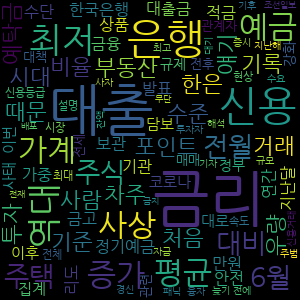

In [10]:
wordcloud = WordCloud(
    max_font_size=60, 
    width=300,
    height=300,
    font_path=path,
    relative_scaling='auto',  
    background_color='black')
wordcloud.generate_from_frequencies(c) 
wordcloud.to_image()

# Bike Sharing Demand

출처: https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

## Load Dataset

첨부된 train 데이터를 불러와주세요.

In [11]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 전처리
datetime의 data를 연/월/일/시간/분/초/요일로 쪼개서 새로운 컬럼에 담아주세요.
전처리 하고 나면 연 컬럼, 월 컬럼부터 초 컬럼, 요일 컬럼까지 총 7개의 컬럼이 추가 되어야합니다.
<br>Hint:파이썬에 내장된 .dt 함수를 활용해주세요.

In [13]:
from datetime import datetime

In [14]:
df["datetime"] = pd.to_datetime(df["datetime"], format='%Y-%m-%d %H:%M:%S', errors='raise')

df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["minute"] = df["datetime"].dt.minute
df["second"] = df["datetime"].dt.second
df["weekday"] = df["datetime"].dt.weekday

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


datetime의 요일 컬럼을 사람이 알아보기 쉽게 Monday~Sunday로 바꿔주세요.
dt 함수를 사용하셨다면 다음과 같이 바꾸시면 됩니다.
<br> 0 = Monday
<br> 1 = Tuesday
<br> 2 = Wednesday
<br> 3 = Thursday
<br> 4 = Friday
<br> 5 = Saturday
<br> 6 = Sunday

In [15]:
df["weekday"] = df["weekday"].replace({0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"})
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday


## 시각화



### 1)
연도별 자전거 대여량과 월별 자전거 대여량을 시각화 해주세요.

이후 각 시각화한 plot에서 각자 인사이트를 도출해주세요.

<br> 힌트: barchart, 계절

In [16]:
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")
  
current_font()

Python 3.7.12
설정 폰트 글꼴: ['NanumGothic'], 설정 폰트 사이즈: 10.0


In [17]:
df["year"].unique()

array([2011, 2012])

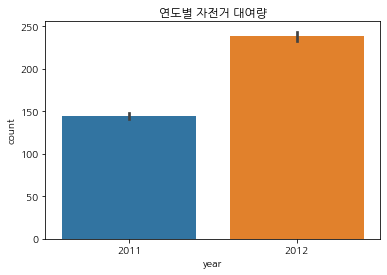

In [18]:
graph = sns.barplot(data=df, x='year', y='count')
plt.title("연도별 자전거 대여량")
plt.show()

#2011년에 비해 2012년에 자전거 대여량이 증가했음을 알 수 있다.

In [19]:
df["month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

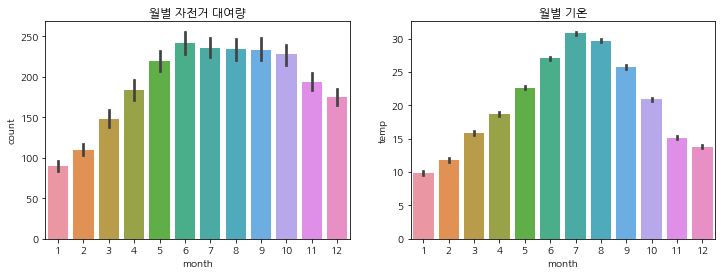

In [20]:
f, axes = plt.subplots(2, 1, figsize=(12, 4))

plt.subplot(1, 2, 1)
graph_1 = sns.barplot(data=df, x='month', y='count')
graph_1.set_title("월별 자전거 대여량")

plt.subplot(1, 2, 2)
graph_2 = sns.barplot(data=df, x='month', y='temp')
graph_2.set_title("월별 기온")

plt.show()

#기온이 낮은 11, 12, 1, 2, 3, 4월(겨울)은 자전거 대여량이 적은 반면 기온이 높은 5, 6, 7, 8, 9, 10월(여름)은 자전거 대여량이 많다.
#즉, 기온과 자전거 대여량은 비례함을 알 수 있다.

###2)
연컬럼과 월컬럼을 합쳐주세요. 이후 2011년 1월부터 2012년 12월까지 월별 자전거 대여량을 시각화 해주세요. 

이전에 시각화한 월별 자전거 대여량 시각화 차트에서, 어째서 1월과 12월의 자전거 대여량의 차이가 크게 났는지 설명해주세요.

In [21]:
df["year"].dtype

dtype('int64')

In [22]:
df["year"] = df["year"].astype("str")
df["month"] = df["month"].astype("str")

df["year, month"] = df[["year", "month"]].apply(". ".join, axis=1)

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday,"year, month"
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday,2011. 1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday,2011. 1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday,2011. 1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday,2011. 1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday,2011. 1


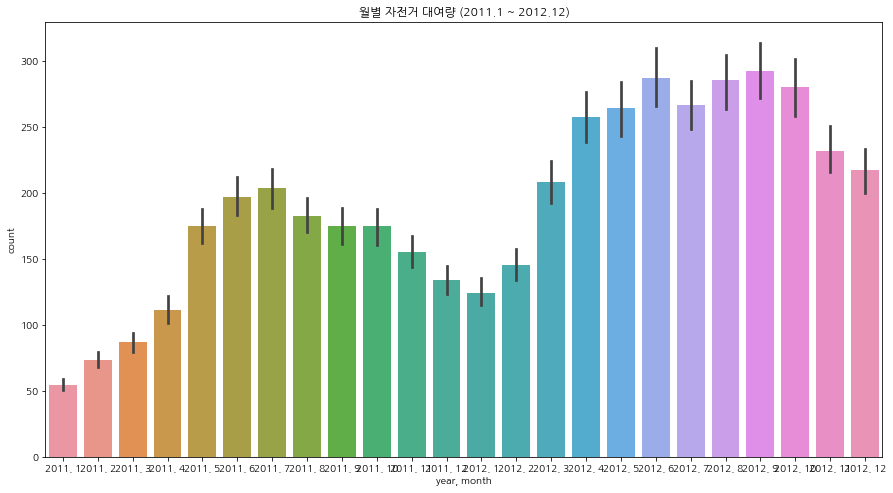

In [23]:
plt.rcParams["figure.figsize"] = 15, 8
graph = sns.barplot(data=df, x='year, month', y='count')
graph.set_title("월별 자전거 대여량 (2011.1 ~ 2012.12)")
plt.show()

#2011년 12월과 2012년의 1월의 자전거 대여량에는 큰 차이가 없지만, 2011년과 2012년 각각에서 1월과 12월의 자전거 대여량은 두 배 가량 증가했다.
#또한 2011년에 비해 2012년에는 전반적으로 자전거 대여량이 두 배 가량 증가했다.
#이에 따라 2011년 12월과 2012년 1월의 자전거 대여량에는 큰 차이가 없음에도 불구하고, 전체 1월과 12월의 자전거 대여량은 크게 차이가 나게 되었다.

###3)
아래의 정보가 나타나게 시각화 해주세요.
<br>1) 시간별 자전거 대여량
<br>2) 근무일/휴일에 따른 시간별 자전거 대여량
<br>3) 요일에 따른 시간별 자전거 대여량

이 플랏에서 인사이트를 도출해주세요.

Hint: pointplot, hue

In [24]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday,"year, month"
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday,2011. 1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday,2011. 1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday,2011. 1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday,2011. 1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday,2011. 1


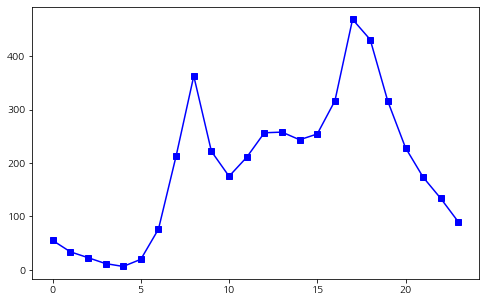

In [25]:
# 1) 시간별 자전거 대여량

plt.rcParams["figure.figsize"] = 8,5

df_hour = df.groupby("hour").mean()

plt.plot(df_hour.index, df_hour["count"].T, marker='s', color='blue')

plt.show()

# 사람들이 주로 취침하는 시간대인 0시에서 5시 경에는 대여량이 적은 반면, 사람들이 주로 활동하는 시간대인 7시에서 20시 경에는 대여량이 많다.
# 8시와 17, 18시의 대여량이 특히 많은데, 이를 통해 출퇴근 시간에 사람들이 자전거를 많이 이용하고 있음을 예측해볼 수 있다.

# Q. plt.plot(df_hour.index, df_hour["count"], marker='s', color='blue')으로 하면 왜 ValueError가 뜨지? 세션때는 똑같이 해도 괜찮았는데,,

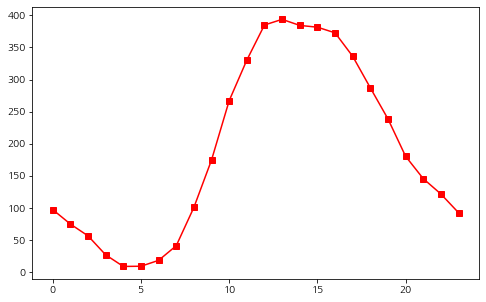

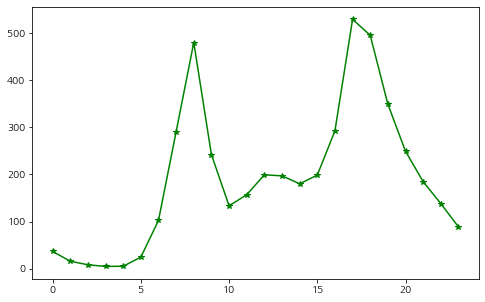

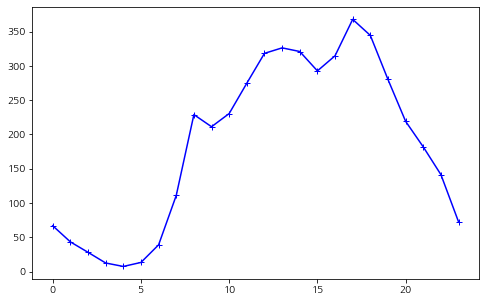

In [26]:
# 2) 근무일, 휴일에 따른 시간별 자전거 대여량

df_workingday = df.groupby(["holiday", "workingday", "hour"]).mean()
df_workingday

df_00 = df[ (df["holiday"] == 0) & (df["workingday"] == 0) ] 
df_01 = df[ (df["holiday"] == 0) & (df["workingday"] == 1) ] 
df_10 = df[ (df["holiday"] == 1) & (df["workingday"] == 0) ] 

df_list = [df_00, df_01, df_10]
marker_list = ["s", "*", "+"]
color_list = ["r", "g", "b"]
 
for i, df in enumerate(df_list):
    df_hour = df.groupby("hour").mean()
    plt.plot(df_hour.index, df_hour["count"].T, marker=marker_list[i], color=color_list[i])
    plt.show()

# holiday(df_10)에는 낮 시간대에 대여량이 집중되어있는 반면, workingday(df_01)에는 출퇴근 시간대에 대여량이 집중되어 있다.
# Q. holiday = 0, workingday = 0은 뭐지?

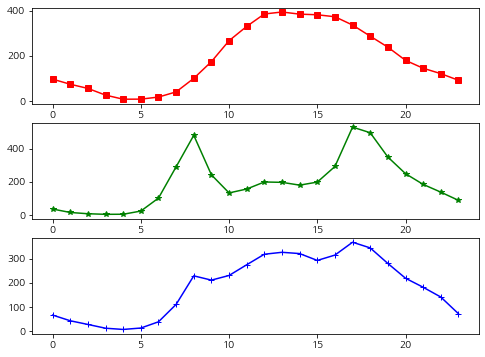

In [27]:
# subplot으로 그래프 그리기
f, axes = plt.subplots(3, 1, figsize=(8, 6))
plt.subplot(3, 1, 1) #2개의 행과 2개의 열로 나눠진 곳에서 첫 번째에 그래프를 그려넣겠다.
df_hour = df_00.groupby("hour").mean()
plt.plot(df_hour.index, df_hour["count"].T, marker=marker_list[0], color=color_list[0])
plt.subplot(3, 1, 2) #2개의 행과 2개의 열로 나눠진 곳에서 첫 번째에 그래프를 그려넣겠다.
df_hour = df_01.groupby("hour").mean()
plt.plot(df_hour.index, df_hour["count"].T, marker=marker_list[1], color=color_list[1])
plt.subplot(3, 1, 3) #2개의 행과 2개의 열로 나눠진 곳에서 첫 번째에 그래프를 그려넣겠다.
df_hour = df_10.groupby("hour").mean()
plt.plot(df_hour.index, df_hour["count"].T, marker=marker_list[2], color=color_list[2])


In [28]:
# 3) 요일에 따른 시간별 자전거 대여량

df["weekday"].unique()

array(['Monday', 'Friday', 'Wednesday'], dtype=object)

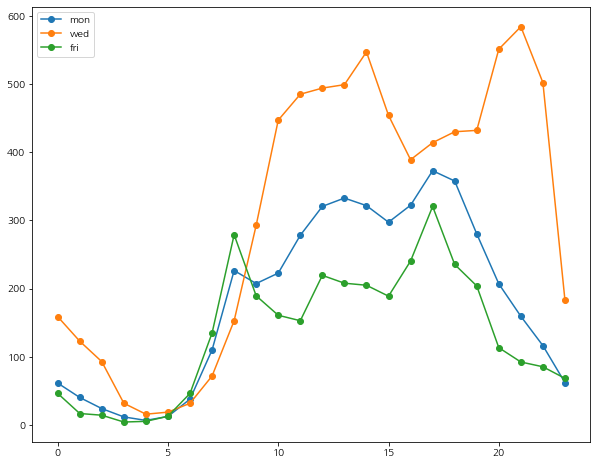

In [29]:
df_mon = df[ df["weekday"] == "Monday" ]
df_wed = df[ df["weekday"] == "Wednesday" ]
df_fri = df[ df["weekday"] == "Friday" ]

df_list = [df_mon, df_wed, df_fri]
weekday_list = ["mon", "wed", "fri"]

fig = plt.figure(figsize=(10, 8)) # 캔버스 생성
ax = fig.add_subplot() # 프레임 생성

for i, df in enumerate(df_list):
    df_hour = df.groupby("hour").mean()
    ax.plot(df_hour.index, df_hour["count"].T, marker='o', label=weekday_list[i])

ax.legend()

plt.show()

# 월요일에는 출퇴근 시간대 외에 낮 시간대에도 자전거 대여량이 많다.
# 수요일에는 타 요일에 비해 전체적으로 자전거 대여량이 많으며, 출퇴근 시간대 이외의 시간대에 대여량이 많은 것이 눈에 띈다.
# 금요일에는 전체적으로 자전거 대여량이 적으며, 출퇴근 시간대에 자전거 대여량이 많다. 

# mpg


## Load Dataset
seaborn을 이용해 'mpg'데이터셋을 불러와주세요.

In [30]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 시각화

model_year과 mpg 데이터 값을 산점도로 보여주고, 그 간의 선형관계를 선으로 보여주세요.
<br> Hint: regplot

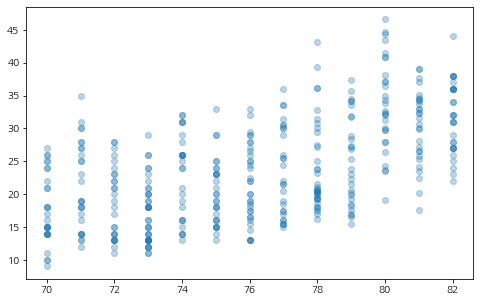

In [31]:
plt.scatter(mpg['model_year'], mpg['mpg'], alpha = 0.3)
plt.show()

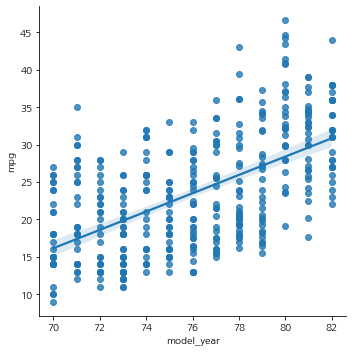

In [32]:
sns.lmplot(x="model_year", y="mpg", data=mpg)

너무너무 고생 많으셨습니다!! 시각화 세션 화이팅하세요ㅎㅎㅎ
